In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_auc_score
)

# For traditional ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import xgboost as xgb

# For deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    Conv1D,
    GlobalMaxPooling1D,
    Dense
)

gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU found and memory growth set.")
    except Exception as e:
        print("Could not set memory growth:", e)
else:
    print("No GPU found; training will occur on CPU.")


GPU found and memory growth set.


In [2]:
df = pd.read_csv("preprocessed_emotions.csv")

# Features & labels
X = df["clean_text"].astype(str)
y = df["label_encoded"].astype(int)

# Train/Test split (stratify to preserve class proportions)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print(f"Dataset sizes → Train: {len(X_train_raw)}, Test: {len(X_test_raw)}")

tfidf = TfidfVectorizer(max_features=10_000)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

VOCAB_SIZE = 10_000
MAX_LEN    = 100  # maximum token length for padding

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_raw)

# Convert texts to sequences, then pad to MAX_LEN
X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq  = tokenizer.texts_to_sequences(X_test_raw)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding="post", truncating="post")
X_test_pad  = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding="post", truncating="post")

# One-hot encode labels for DL
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat  = to_categorical(y_test,  num_classes=num_classes)

def evaluate_model(y_true, y_pred, model_name="Model", average='binary', show_report=True):

    print(f"\n {model_name} - Evaluation Metrics")
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average, zero_division=0)
    rec = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)

    print(f"→ Accuracy:  {acc:.4f}")
    print(f"→ Precision: {prec:.4f}")
    print(f"→ Recall:    {rec:.4f}")
    print(f"→ F1 Score:  {f1:.4f}")

    # Try computing ROC AUC if it's a binary classification
    try:
        if len(np.unique(y_true)) == 2:
            auc = roc_auc_score(y_true, y_pred)
            print(f"→ ROC AUC:   {auc:.4f}")
    except Exception as e:
        print(f"ROC AUC not computed: {e}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


Dataset sizes → Train: 333447, Test: 83362



=== Training: Logistic Regression ===

 Logistic Regression - Evaluation Metrics
→ Accuracy:  0.8993
→ Precision: 0.8629
→ Recall:    0.8492
→ F1 Score:  0.8557


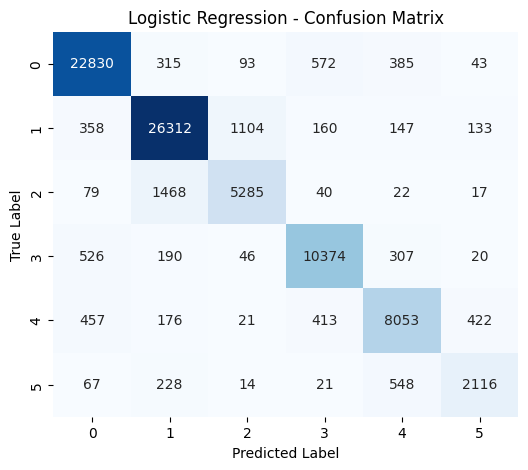


=== Training: SVM (LinearSVC) ===


c:\Users\Tilak Devi\anaconda3\envs\main\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



 SVM (LinearSVC) - Evaluation Metrics
→ Accuracy:  0.8946
→ Precision: 0.8491
→ Recall:    0.8471
→ F1 Score:  0.8481


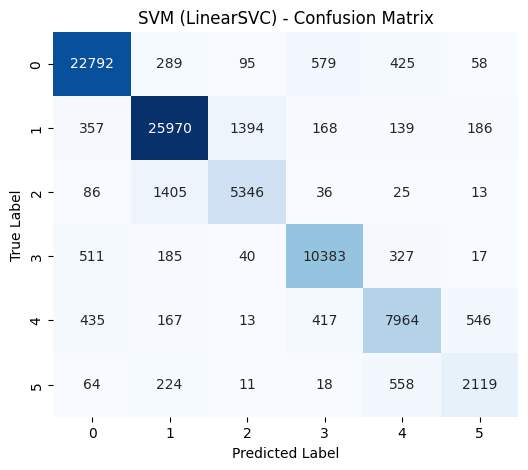


=== Training: XGBoost ===


c:\Users\Tilak Devi\anaconda3\envs\main\lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.64362
[1]	validation_0-mlogloss:1.53231
[2]	validation_0-mlogloss:1.43858
[3]	validation_0-mlogloss:1.36290
[4]	validation_0-mlogloss:1.29841
[5]	validation_0-mlogloss:1.24652
[6]	validation_0-mlogloss:1.20122
[7]	validation_0-mlogloss:1.16116
[8]	validation_0-mlogloss:1.12490
[9]	validation_0-mlogloss:1.09063
[10]	validation_0-mlogloss:1.05928
[11]	validation_0-mlogloss:1.03149
[12]	validation_0-mlogloss:1.00589
[13]	validation_0-mlogloss:0.98303
[14]	validation_0-mlogloss:0.96238
[15]	validation_0-mlogloss:0.94275
[16]	validation_0-mlogloss:0.92406
[17]	validation_0-mlogloss:0.90647
[18]	validation_0-mlogloss:0.89010
[19]	validation_0-mlogloss:0.87435
[20]	validation_0-mlogloss:0.85955
[21]	validation_0-mlogloss:0.84471
[22]	validation_0-mlogloss:0.83104
[23]	validation_0-mlogloss:0.81743
[24]	validation_0-mlogloss:0.80466
[25]	validation_0-mlogloss:0.79199
[26]	validation_0-mlogloss:0.78002
[27]	validation_0-mlogloss:0.76868
[28]	validation_0-mlogloss:0.7

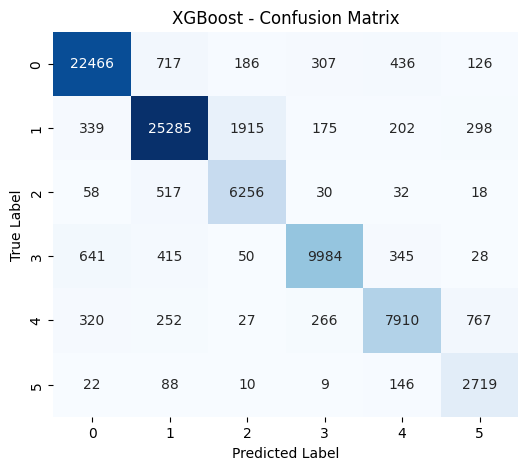

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import xgboost as xgb

# Logistic Regression
print("\n=== Training: Logistic Regression ===")
lr_model = LogisticRegression(max_iter=1_000, solver="lbfgs", n_jobs=-1)
lr_model.fit(X_train_tfidf, y_train)

lr_preds = lr_model.predict(X_test_tfidf)
evaluate_model(y_test, lr_preds, model_name="Logistic Regression", average="macro")

# Support Vector Machine (LinearSVC)
print("\n=== Training: SVM (LinearSVC) ===")
svm_model = LinearSVC(max_iter=10_000)
svm_model.fit(X_train_tfidf, y_train)

svm_preds = svm_model.predict(X_test_tfidf)
evaluate_model(y_test, svm_preds, model_name="SVM (LinearSVC)", average="macro")

# XGBoost
print("\n=== Training: XGBoost ===")
xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",  # Multi-class setup
    use_label_encoder=False,
    eval_metric="mlogloss",
    verbosity=1 
)

# Provide a small eval_set to show progress bar
xgb_model.fit(
    X_train_tfidf,
    y_train,
    eval_set=[(X_test_tfidf, y_test)],
    verbose=True
)

xgb_preds = xgb_model.predict(X_test_tfidf)
evaluate_model(y_test, xgb_preds, model_name="XGBoost", average="macro")



=== Training: Text CNN ===
Epoch 1/10
9379/9379 [==============================] - 134s 14ms/step - loss: 0.1775 - accuracy: 0.9153 - val_loss: 0.1375 - val_accuracy: 0.9267
Epoch 2/10
9379/9379 [==============================] - 80s 9ms/step - loss: 0.1220 - accuracy: 0.9335 - val_loss: 0.1339 - val_accuracy: 0.9291
Epoch 3/10
9379/9379 [==============================] - 54s 6ms/step - loss: 0.1137 - accuracy: 0.9360 - val_loss: 0.1261 - val_accuracy: 0.9272
Epoch 4/10
9379/9379 [==============================] - 112s 12ms/step - loss: 0.1076 - accuracy: 0.9386 - val_loss: 0.1343 - val_accuracy: 0.9253
Epoch 5/10
9379/9379 [==============================] - 97s 10ms/step - loss: 0.1032 - accuracy: 0.9406 - val_loss: 0.1368 - val_accuracy: 0.9234
Epoch 6/10
9379/9379 [==============================] - 53s 6ms/step - loss: 0.0998 - accuracy: 0.9422 - val_loss: 0.1423 - val_accuracy: 0.9156
Epoch 7/10
9379/9379 [==============================] - 53s 6ms/step - loss: 0.0967 - accuracy: 0

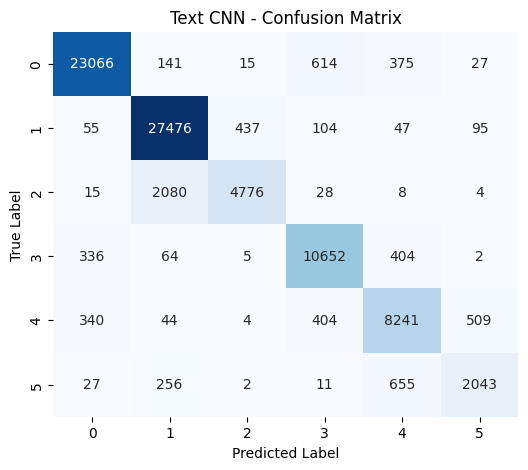

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import numpy as np

print("\n=== Training: Text CNN ===")
cnn_model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=64, input_length=MAX_LEN),
    Conv1D(filters=128, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(num_classes, activation="softmax")  # Assumes one-hot encoded targets
])

cnn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_history = cnn_model.fit(
    X_train_pad,
    y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Predict and convert from one-hot encoding
cnn_preds_prob = cnn_model.predict(X_test_pad, verbose=0)
cnn_preds = np.argmax(cnn_preds_prob, axis=1)

# Evaluate
evaluate_model(y_test, cnn_preds, model_name="Text CNN", average="macro")


In [7]:

results = []

def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    acc = accuracy_score(y_true, y_pred)
    macro_f1 = report["macro avg"]["f1-score"]
    return acc, macro_f1

for name, preds in [
    ("Logistic Regression", lr_preds),
    ("SVM (LinearSVC)", svm_preds),
    ("XGBoost", xgb_preds),
    ("Text CNN", cnn_preds)
]:
    acc, macro_f1 = get_metrics(y_test, preds)
    results.append((name, acc, macro_f1))

results_df = pd.DataFrame(
    results, columns=["Model", "Accuracy", "Macro F1"]
).sort_values(by="Accuracy", ascending=False)

print("\n=== Summary of Model Performance ===")
print(results_df.to_string(index=False))



=== Summary of Model Performance ===
              Model  Accuracy  Macro F1
           Text CNN  0.914733  0.863221
Logistic Regression  0.899331  0.855700
            XGBoost  0.895132  0.865190
    SVM (LinearSVC)  0.894580  0.848057


In [ ]:
import joblib

joblib.dump(xgb_model, "xgboost_model.pkl")

joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']